In [6]:
import pandas as pd

df = pd.read_csv('/Users/jp/Desktop/Bridge Ann Project/Data/lab_11_bridge_data.csv')
print(df.head())


  Bridge_ID  Span_ft  Deck_Width_ft  Age_Years  Num_Lanes   Material  \
0      B001      403             25         77          4      Steel   
1      B002      511             34         15          6  Composite   
2      B003      225             20         10          1  Composite   
3      B004      380             29         26          1      Steel   
4      B005      565             20         88          5      Steel   

   Condition_Rating  Max_Load_Tons  
0                 5            249  
1                 2            233  
2                 2            102  
3                 1            100  
4                 1            206  


In [7]:
df.isnull().sum()  # Check for missing values
df = df.dropna()   # Drop or fill missing data

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import pickle

# One-hot encode 'Material'
df_encoded = pd.get_dummies(df, columns=['Material'], drop_first=True)

# Prepare features and target
X = df_encoded.drop(['Bridge_ID', 'Max_Load_Tons'], axis=1)
y = df_encoded['Max_Load_Tons']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
import matplotlib.pyplot as plt

# Build the model
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile with full loss object
model.compile(optimizer='adam', loss=MeanSquaredError())

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# Save the model (choose one format)
model.save('tf_bridge_model.h5')       # legacy format (just update in app.py)
# model.save('tf_bridge_model.keras')  # new format (optional)


Epoch 1/100


/opt/anaconda3/envs/bridge-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32447.7578 - val_loss: 32998.5234
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32283.8633 - val_loss: 32770.3438
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32598.7715 - val_loss: 32500.1523
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31890.2441 - val_loss: 32162.5898
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31987.7305 - val_loss: 31741.8867
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32235.2637 - val_loss: 31209.1914
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30815.4512 - val_loss: 30543.4258
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30675.2910 - val_loss: 29738.0820
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28827.5312 - val_loss: 28798.7969
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28518.8496 - val_loss: 27705.3750
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27495.9238 - val_los

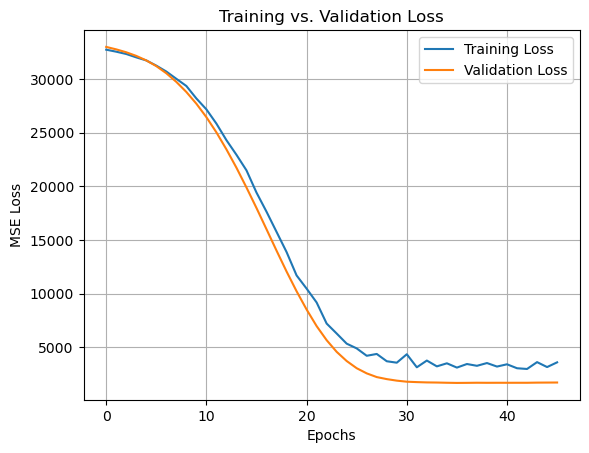

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()